In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [3]:
seed = 42
np.random.seed(seed)

In [4]:
drop_cols = ["time_stamp",
             "Machine1.Zone1Temperature.C.Actual", "Machine2.Zone1Temperature.C.Actual", "Machine3.Zone1Temperature.C.Actual",
             "Machine1.Zone2Temperature.C.Actual", "Machine2.Zone2Temperature.C.Actual", "Machine3.Zone2Temperature.C.Actual",
             "Machine2.ExitZoneTemperature.C.Actual", "Machine3.ExitZoneTemperature.C.Actual",
             "Machine1.MotorAmperage.U.Actual", "Machine2.MotorAmperage.U.Actual", "Machine3.MotorAmperage.U.Actual",
             "Machine2.MotorRPM.C.Actual",
             "FirstStage.CombinerOperation.Temperature3.C.Actual"]

In [5]:
df0_indexed = pd.read_csv("../Data/df0_indexed.csv")

X0, y0 = df0_indexed.iloc[:, :42], df0_indexed.iloc[:, 42:44]

X0_reduced = X0.copy()
X0_reduced.drop(drop_cols, axis=1, inplace=True)

y0_Actual = y0.iloc[:, 0]

In [6]:
X0_reduced.shape

(13261, 28)

In [7]:
def base_model():
    # create model
    model = Sequential()
    model.add(Dense(28, input_dim=28, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

In [20]:
estimators = []
estimators.append(('robust', RobustScaler()))
estimators.append(('kerasReg', KerasRegressor(build_fn=base_model, epochs=10, batch_size=10, verbose=1)))

In [21]:
pipe = Pipeline(estimators)

In [22]:
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

In [23]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0_reduced, y0_Actual, test_size=0.2, random_state=seed)

In [24]:
# cross_val_score(pipe, X0_train, y0_train, cv=kfold, n_jobs=1)

In [25]:
pipe.fit(X0_train, y0_train)

Epoch 1/10
1061/1061 [==============================] - 1s 772us/step - loss: 10.4875
Epoch 2/10
1061/1061 [==============================] - 1s 765us/step - loss: 0.6536
Epoch 3/10
1061/1061 [==============================] - 1s 759us/step - loss: 0.0697
Epoch 4/10
1061/1061 [==============================] - 1s 760us/step - loss: 0.0140
Epoch 5/10
1061/1061 [==============================] - 1s 763us/step - loss: 0.0115
Epoch 6/10
1061/1061 [==============================] - 1s 758us/step - loss: 0.0103
Epoch 7/10
1061/1061 [==============================] - 1s 763us/step - loss: 0.0099
Epoch 8/10
1061/1061 [==============================] - 1s 759us/step - loss: 0.0090
Epoch 9/10
1061/1061 [==============================] - 1s 769us/step - loss: 0.0087
Epoch 10/10
1061/1061 [==============================] - 1s 807us/step - loss: 0.0078


Pipeline(steps=[('robust', RobustScaler()),
                ('kerasReg',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000002353ED00A58>)])

In [26]:
y0_pred = pipe.predict(X0_test)

266/266 [==============================] - 0s 535us/step


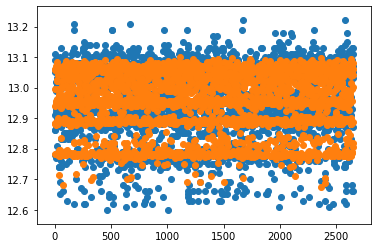

In [27]:
plt.scatter(np.arange(len(X0_test)), y0_test)
plt.scatter(np.arange(len(X0_test)), y0_pred)

1327/1327 [==============================] - 1s 532us/step


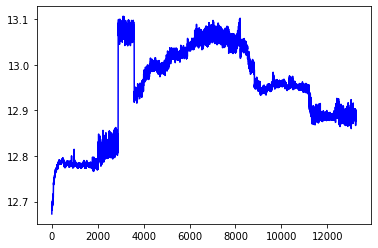

In [28]:
plt.plot(pipe.predict(X0_reduced), "b")

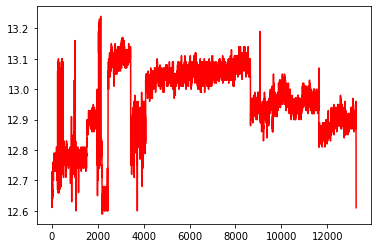

In [29]:
plt.plot(y0_Actual, "r")

In [30]:
pipe.score(X0_test, y0_test)

266/266 [==============================] - 0s 595us/step - loss: 0.0070


-0.007015732116997242

In [31]:
rmse = np.sqrt(mean_squared_error(y0_test, y0_pred))
rmse

0.08375998195261687